dataset: https://www.kaggle.com/dalpozz/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

FILE_NAME = 'creditcard.csv'

In [3]:
#load data
full_data = pd.read_csv(FILE_NAME)

#rename the 'Class' column
full_data.rename(columns = {'Class': 'Label'}, inplace = True)

#let's take a peek
print full_data.shape
full_data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from sklearn.utils import shuffle
full_data = shuffle(full_data)

# Seperate target labels
labels = full_data['Label']

times = full_data['Time']
features = full_data.drop(['Time', 'Label'], axis=1)

# Get some specifics on our dataset
print "Data consists of {} instances of data with {} total features with value counts of \n{}".format(
    features.shape[0], features.shape[1], labels.value_counts())
print "Where 0 indicates a legitimate transaction and 1 indicates fraud"

Data consists of 284807 instances of data with 29 total features with value counts of 
0    284315
1       492
Name: Label, dtype: int64
Where 0 indicates a legitimate transaction and 1 indicates fraud


In [5]:
from sklearn.preprocessing import StandardScaler

# Scale the amount spent
features['normAmount'] = StandardScaler().fit_transform(features['Amount'].reshape(-1, 1))

In [6]:
amounts = features['Amount']
features = features.drop(['Amount'], axis=1)
features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
185792,1.397299,-1.741681,-1.702283,-0.546288,1.178657,4.095666,-1.112828,1.051522,1.153431,-0.134940,...,0.499839,0.190863,-0.081690,0.109755,0.742016,-0.672251,0.452993,-0.050097,0.006405,0.854153
92080,-6.585849,5.536218,-5.384978,0.722320,-3.401588,-0.964978,-3.518547,5.100348,-0.911330,0.741915,...,-0.288105,0.430075,0.482247,0.778484,-0.314855,-0.022651,-0.347376,-0.419721,-0.100811,-0.349671
100052,-0.819556,0.749402,1.561889,1.375082,-0.135148,0.926043,-0.374834,0.838653,-0.276296,-0.486815,...,-0.044613,0.118976,0.524225,-0.181750,-0.256281,-0.160029,-0.184082,0.096795,0.045204,-0.329481
253908,2.255542,-1.221431,-2.080572,-1.629280,-0.436930,-1.018379,-0.253582,-0.442473,-2.097884,1.804853,...,-0.348068,0.022843,0.523847,-0.095561,-0.353712,0.378789,0.110946,-0.053256,-0.082588,-0.117582
58136,0.021365,-0.301952,1.135928,-1.124444,-0.349726,0.943416,-0.558524,0.310153,-2.823375,1.329564,...,-0.261638,0.054702,0.769835,0.077042,-0.639253,-0.802412,0.123912,0.261039,0.142663,-0.344394


In [7]:
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer, confusion_matrix

f1_scorer = make_scorer(f1_score, pos_label = 0)

# We're going to hold out a test set from oversampling to see how our model trained on the oversampled data does on the original data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = .25)

print train_labels.value_counts()
print test_labels.value_counts()

0    213239
1       366
Name: Label, dtype: int64
0    71076
1      126
Name: Label, dtype: int64


In [8]:
from imblearn.over_sampling import SMOTE

# implement synthetic minority oversampling technique for a more balanced dataset to feed our model
oversampler = SMOTE(random_state=331)
os_features, os_labels = oversampler.fit_sample(train_features, train_labels)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(os_features, os_labels, test_size = .25)

# Let's get an idea of what our new oversampled data looks like

print 'training instances of data:' , len(y_train) 
print 'training instances of fraud' , np.count_nonzero(y_train)
print 'testing instances of data:' , len(y_test) 
print 'testing instances of fraud:' , np.count_nonzero(y_test)

training instances of data: 319858
training instances of fraud 159735
testing instances of data: 106620
testing instances of fraud: 53504


In [10]:
# Try a couple out-of-the-box classifiers to establish a benchmark
rf = RandomForestClassifier()
knn = KNeighborsClassifier()

print "For Random Forest Classifier:"
rfscores = cross_val_score(rf, os_features, os_labels, scoring = f1_scorer)
print rfscores, rfscores.mean()

print "For K-Nearest Neighbors Classifier:"
knnscores = cross_val_score(knn, os_features, os_labels, scoring = f1_scorer)
print knnscores, knnscores.mean()

For Random Forest Classifier:
[ 0.99985226  0.99984522  0.99988744] 0.999861641878
For K-Nearest Neighbors Classifier:
[ 0.99878158  0.99897898  0.99884502] 0.998868527103


In [11]:
# simple majority vote benchmark without oversampling
majority_vote_predictions = np.zeros(features.shape[0])
print "f1 score for simple majority vote is " , f1_score(labels, majority_vote_predictions, pos_label = 0)

f1 score for simple majority vote is  0.999135510488


In [12]:
# Random Forest Classifier looked promising, let's try to tune the hyper-parameters to get better results
rf_params = {'n_estimators' : np.arange(10, 110, 15),
                'min_samples_split': np.arange(2, 8, 2),
                'max_features': np.arange(1, 29, 4),
                'criterion': ['gini', 'entropy']}


rf_tune = RandomizedSearchCV(rf, rf_params, n_iter = 25, scoring = f1_scorer, verbose = 3)

rf_tune = rf_tune.fit(os_features, os_labels)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] n_estimators=100, min_samples_split=4, criterion=gini, max_features=1 
[CV]  n_estimators=100, min_samples_split=4, criterion=gini, max_features=1, score=0.999902 -   3.0s
[CV] n_estimators=100, min_samples_split=4, criterion=gini, max_features=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=4, criterion=gini, max_features=1, score=0.999852 -   2.5s
[CV] n_estimators=100, min_samples_split=4, criterion=gini, max_features=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=4, criterion=gini, max_features=1, score=0.999909 -   2.4s
[CV] n_estimators=70, min_samples_split=2, criterion=entropy, max_features=25 
[CV]  n_estimators=70, min_samples_split=2, criterion=entropy, max_features=25, score=0.999782 -   1.2s
[CV] n_estimators=70, min_samples_split=2, criterion=entropy, max_features=25 
[CV]  n_estimators=70, min_samples_split=2, criterion=entropy, max_features=25, score=0.999789 -   1.1s
[CV] n_estimators=70, min_samples_split=2, criterion=entropy, max_features=25 
[CV]  n_estimators=70, min_samples_split=2, criterion=entropy, max_features=25, score=0.999796 -   1.4s
[CV] n_estimators=55, min_samples_split=4, criterion=entropy, max_features=1 
[CV]  n_estimators=55, min_samples_split=4, criterion=entropy, max_features=1, score=0.999902 -   1.3s
[CV] n_estimators=55, min_samples_split=4, criterion=entropy, max_features=1 
[CV]  n_estimators=55, min_samples_split=4, criterion=entropy, max_features=1, score=0.9998

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 446.3min finished


In [13]:
print rf_tune.best_estimator_ , '\nf1 score:' , rf_tune.best_score_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=55, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False) 
f1 score: 0.999894473029


In [14]:
rft = rf_tune.best_estimator_
rft.fit_transform(X_train, y_train)

C:\Users\Sunny\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[  2.23680075,  -4.56654399,   4.70044703, ...,  -9.81446283,
         -7.50218262,  -9.79137868],
       [  3.79214682,  -5.2825743 ,   2.79352888, ...,  -6.22354782,
         -1.92455349,  -3.53997487],
       [  8.98284196, -23.01996283,  11.85558537, ..., -13.64830977,
         -7.91042923, -11.88942851],
       ..., 
       [  0.9227921 ,   1.35322822,   2.46156735, ...,  -0.27296682,
          0.18609665,  -0.28561962],
       [  1.85965455,  -5.90800958,   2.03285475, ...,  -7.26265411,
         -3.8487812 ,  -5.25077537],
       [  1.24173691,  -1.43606486,   2.2338707 , ...,  -4.70004828,
         -2.67023692,  -5.65688996]])

In [15]:
# Check performance of tuned model 
# Add check on original data before oversampling
print "f1 testing score for tuned random forest on oversampled data is ", f1_score(y_test, rft.predict(X_test), pos_label = 0)
print "f1 testing score for tuned random forest on original test data is ", f1_score(test_labels, rft.predict(test_features), pos_label = 0)

f1 testing score for tuned random forest on oversampled data is  0.999887026925
f1 testing score for tuned random forest on original test data is  0.999711598658


In [16]:
print "Confusion matrix of random forest performance on oversampled test data:"
print confusion_matrix(y_test, rft.predict(X_test))
print "Confusion matrix of random forest performance on original test data:"
print confusion_matrix(test_labels, rft.predict(test_features))

Confusion matrix of random forest performance on oversampled test data:
[[53104    12]
 [    0 53504]]
Confusion matrix of random forest performance on original test data:
[[71061    15]
 [   26   100]]


To Do: discuss the results above, especially Type 1 errors on the original test data :/

Now let's try a neural network

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.utils.np_utils import to_categorical

Using Theano backend.


In [18]:
# Let's build a model

# needs more tuning
model = Sequential()
model.add(Dense(40, input_dim = X_train.shape[1], activation = 'tanh', init = 'lecun_uniform', W_regularizer = l2(.01)))
#model.add(Dropout(0.2))
model.add(Dense(12, activation = 'tanh', init = 'lecun_uniform'))
model.add(Dense(4, activation = 'tanh', init = 'lecun_uniform'))
model.add(Dense(output_dim = 1, activation = 'sigmoid'))

sgd = SGD(lr = .16, momentum = .7, decay = .01)

model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['fmeasure'])

In [19]:
history = model.fit(X_train, y_train, nb_epoch = 256, batch_size = 750, verbose = 2, 
                    validation_split = .20, shuffle = True)

Train on 255886 samples, validate on 63972 samples
Epoch 1/256
2s - loss: 0.2149 - fmeasure: 0.9553 - val_loss: 0.0971 - val_fmeasure: 0.9636
Epoch 2/256
1s - loss: 0.1126 - fmeasure: 0.9659 - val_loss: 0.0873 - val_fmeasure: 0.9673
Epoch 3/256
1s - loss: 0.0999 - fmeasure: 0.9684 - val_loss: 0.0805 - val_fmeasure: 0.9677
Epoch 4/256
1s - loss: 0.0924 - fmeasure: 0.9710 - val_loss: 0.0739 - val_fmeasure: 0.9715
Epoch 5/256
1s - loss: 0.0869 - fmeasure: 0.9731 - val_loss: 0.0686 - val_fmeasure: 0.9737
Epoch 6/256
1s - loss: 0.0827 - fmeasure: 0.9750 - val_loss: 0.0649 - val_fmeasure: 0.9760
Epoch 7/256
1s - loss: 0.0796 - fmeasure: 0.9761 - val_loss: 0.0628 - val_fmeasure: 0.9761
Epoch 8/256
1s - loss: 0.0773 - fmeasure: 0.9773 - val_loss: 0.0606 - val_fmeasure: 0.9769
Epoch 9/256
1s - loss: 0.0755 - fmeasure: 0.9780 - val_loss: 0.0584 - val_fmeasure: 0.9767
Epoch 10/256
1s - loss: 0.0739 - fmeasure: 0.9787 - val_loss: 0.0570 - val_fmeasure: 0.9803
Epoch 11/256
1s - loss: 0.0726 - fmeas

In [20]:
predictions = model.predict(X_test)
predictions[:] = predictions[:]>0.5

print "Our neural network achieves an f1 score of " , f1_score(y_test, predictions, pos_label = 0) , "on the oversampled testing data"
print confusion_matrix(y_test, predictions)

opredictions = model.predict(test_features.values)
opredictions[:] = opredictions[:]>0.5
print "Our neural network achieves an f1 score of" , f1_score(test_labels.values, opredictions, pos_label = 0) , "on the original testing data"
print confusion_matrix(test_labels.values, opredictions)

Our neural network achieves an f1 score of  0.990465951849 on the oversampled testing data
[[52515   601]
 [  410 53094]]
Our neural network achieves an f1 score of 0.993672767421 on the original testing data
[[70200   876]
 [   18   108]]


To Do: Discuss these results; Looks like tuned random forest does better on oversampled data but neural network performs better on the original (non-oversampled) data

<function matplotlib.pyplot.show>

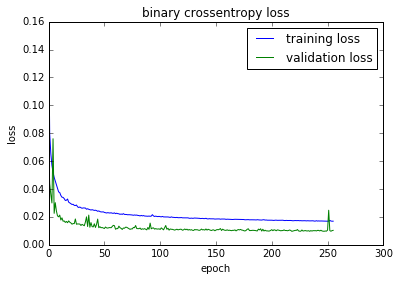

In [41]:
# Plot training loss history

# Training for less epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('binary crossentropy loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc = 'upper right')
plt.show